In [1]:
import numpy as numpy
import pandas as pd
from stylized_swc import gen_stylized_swc, plot_morphology_swc
%matplotlib notebook

# The parameters in this file is converted from the detailed morphology algorimically (stylized_model.ipynb).
geo_prop = pd.read_csv('geom_parameters.csv',index_col='id')
geo_prop

,name,type,axial,L,R,ang,pid
id,,,,,,,
0,soma,1,True,0.000,6.6606,0.000000,0
1,axon,2,True,34.608,0.3240,-1.570796,0
2,basal,3,False,203.727,0.2420,-0.665215,0
3,apical,4,False,163.950,0.2200,0.000000,0
4,trunk,4,True,486.773,0.3100,1.570796,0
5,tuft,4,False,137.258,0.1760,0.920738,4


In [2]:
# creating swc format data
styl = gen_stylized_swc(geo_prop)
styl

,type,x,y,z,r,pid
id,,,,,,
1,1,0.000000,0.000000,0.0,6.6606,-1
2,2,0.000000,-4.944000,0.0,0.3240,1
3,2,0.000000,-9.888000,0.0,0.3240,2
4,2,0.000000,-14.832000,0.0,0.3240,3
5,2,0.000000,-19.776000,0.0,0.3240,4
...,...,...,...,...,...,...
306,4,-71.205454,580.427891,0.0,0.1760,305
307,4,-74.172348,584.330178,0.0,0.1760,306
308,4,-77.139242,588.232465,0.0,0.1760,307


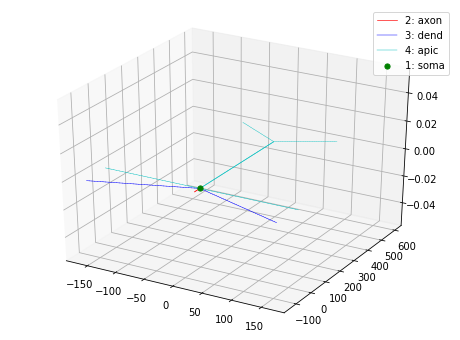

In [3]:
fig,ax = plot_morphology_swc(styl)

Modify geometry parameters

In [4]:
geo_prop.loc[0,'R'] = 3
dL = 10. # no more then 30 um will cause no error (e.g. 50 um will crash bmtk)
# styl = gen_stylized_swc(geo_prop,dL=dL)
# styl

In [3]:
import os
styl = gen_stylized_swc(geo_prop,dL=dL)

# write swc file in bmtk path
dest = 'sim_details/components/morphologies'
styl_file = os.path.join(os.getcwd(),dest,'stylized.swc')
with open(styl_file,'w') as f:
    f.write('# id,type,x,y,z,r,pid\n')
styl.to_csv(styl_file,sep=' ',header=False,float_format='%.4f',mode='a')

In [4]:
from bmtk.simulator import bionet

conf = bionet.Config.from_json('sim_details/simulation_config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)

2020-09-26 15:59:22,933 [INFO] Created log file
2020-09-26 15:59:23,937 [INFO] Building cells.
2020-09-26 15:59:24,797 [INFO] Building recurrent connections


In [5]:
cell = net.get_cell_gid(0)
print(cell._nseg)
for i in [0,1]: # x and y coordinates
    for p in ['p0','p05','p1']: # start, middle, end coordinates of segment
        print(cell.morphology.seg_coords[p][i])

72
[  -3.            7.6328001    24.5946057    41.55641063   58.5181802
   75.48001191   92.44181625  109.40348166  126.36526561  143.32722865
   -7.6328001   -24.5946057   -41.55641063  -58.5181802   -75.48001191
  -92.44181625 -109.40348166 -126.36526561 -143.32722865    9.64410019
   31.68779973   53.73149926   75.7751988    97.81889834  119.86259787
  141.90629741   -9.64410019  -31.68779973  -53.73149926  -75.7751988
  -97.81889834 -119.86259787 -141.90629741    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.           11.86766743   23.73530545   35.60292291
   47.47007514   59.33775666   71.20540878    0.          -11.86766743
  -23.73530545  -35.60292291  -47.47007514  -59.33775666  -71.20540878
    0.           11.68254852]
[   0.         

In [6]:
print(cell.morphology.seg_prop['type'])
print(cell.morphology.seg_coords['d05']) # segment diameter at center
print(cell.morphology.seg_prop['length']) # segment length

[1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2]
[6.         0.484      0.484      0.484      0.484      0.484
 0.484      0.484      0.484      0.484      0.484      0.484
 0.484      0.484      0.484      0.484      0.484      0.484
 0.484      0.44       0.44       0.44       0.44       0.44
 0.44       0.44       0.44       0.44       0.44       0.44
 0.44       0.44       0.44       0.62       0.62       0.62
 0.62       0.62       0.62       0.62       0.62       0.62
 0.62       0.62       0.62       0.62       0.62       0.62
 0.62       0.62       0.62       0.62       0.62       0.62
 0.62       0.62       0.41900236 0.352      0.352      0.352
 0.352      0.352      0.352      0.41900236 0.352      0.352
 0.352      0.352      0.352      0.352      1.         1.        ]
[ 6.         21.55839584 21.55839584 21.55839584 21.55839584 21.55839584
 21.55839584 21.55839584 21.55839584